# DS4C - Assignment: Data Scientist 4 Construction

# Part A: Data Exploration

## Imports

In [250]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [5]:
## path + filename
data_path = "../raw_data/dataset.parquet"

In [6]:
## load data into DF
df = pd.read_parquet(data_path)

## EDA

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surpinsingly large values for block groups with few households
and many empty houses, such as vacation resorts.

### General

In [4]:
## show head of DF
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
## get number of samples/features - 20640 Samples with 9 features
df.shape

(20640, 9)

In [25]:
## get columns/features
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

**Feature description**
- MedInc: median income in block group
- HouseAge: median house age in block group
- AveRooms: average number of rooms per household
- AveBedrms: average number of bedrooms per household
- Population: block group population
- AveOccup: average number of household members
- Latitude: block group latitude
- Longitude: block group longitude
- MedHouseVal: median house value for California districts, expressed in hundreds of thousands of dollars ($100,000)

In [7]:
## get column/feature data types
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [8]:
## check if values are null/missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
## count number of nans per feature
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
## get number of duplicates
df.duplicated().sum()

0

In [11]:
## get number of unique values per column/feature
df.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

In [12]:
## get first overview of features/distribution
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Pairplot (variables excl. lat/lon)

In [264]:
## Drop lon/lat columns
drop = ["Longitude", "Latitude"]
df_subset = df.iloc[:].drop(columns=drop)
## Discretize variable into equal-sized buckets
df_subset["MedHouseVal"] = pd.qcut(df_subset["MedHouseVal"], 5, retbins=False)

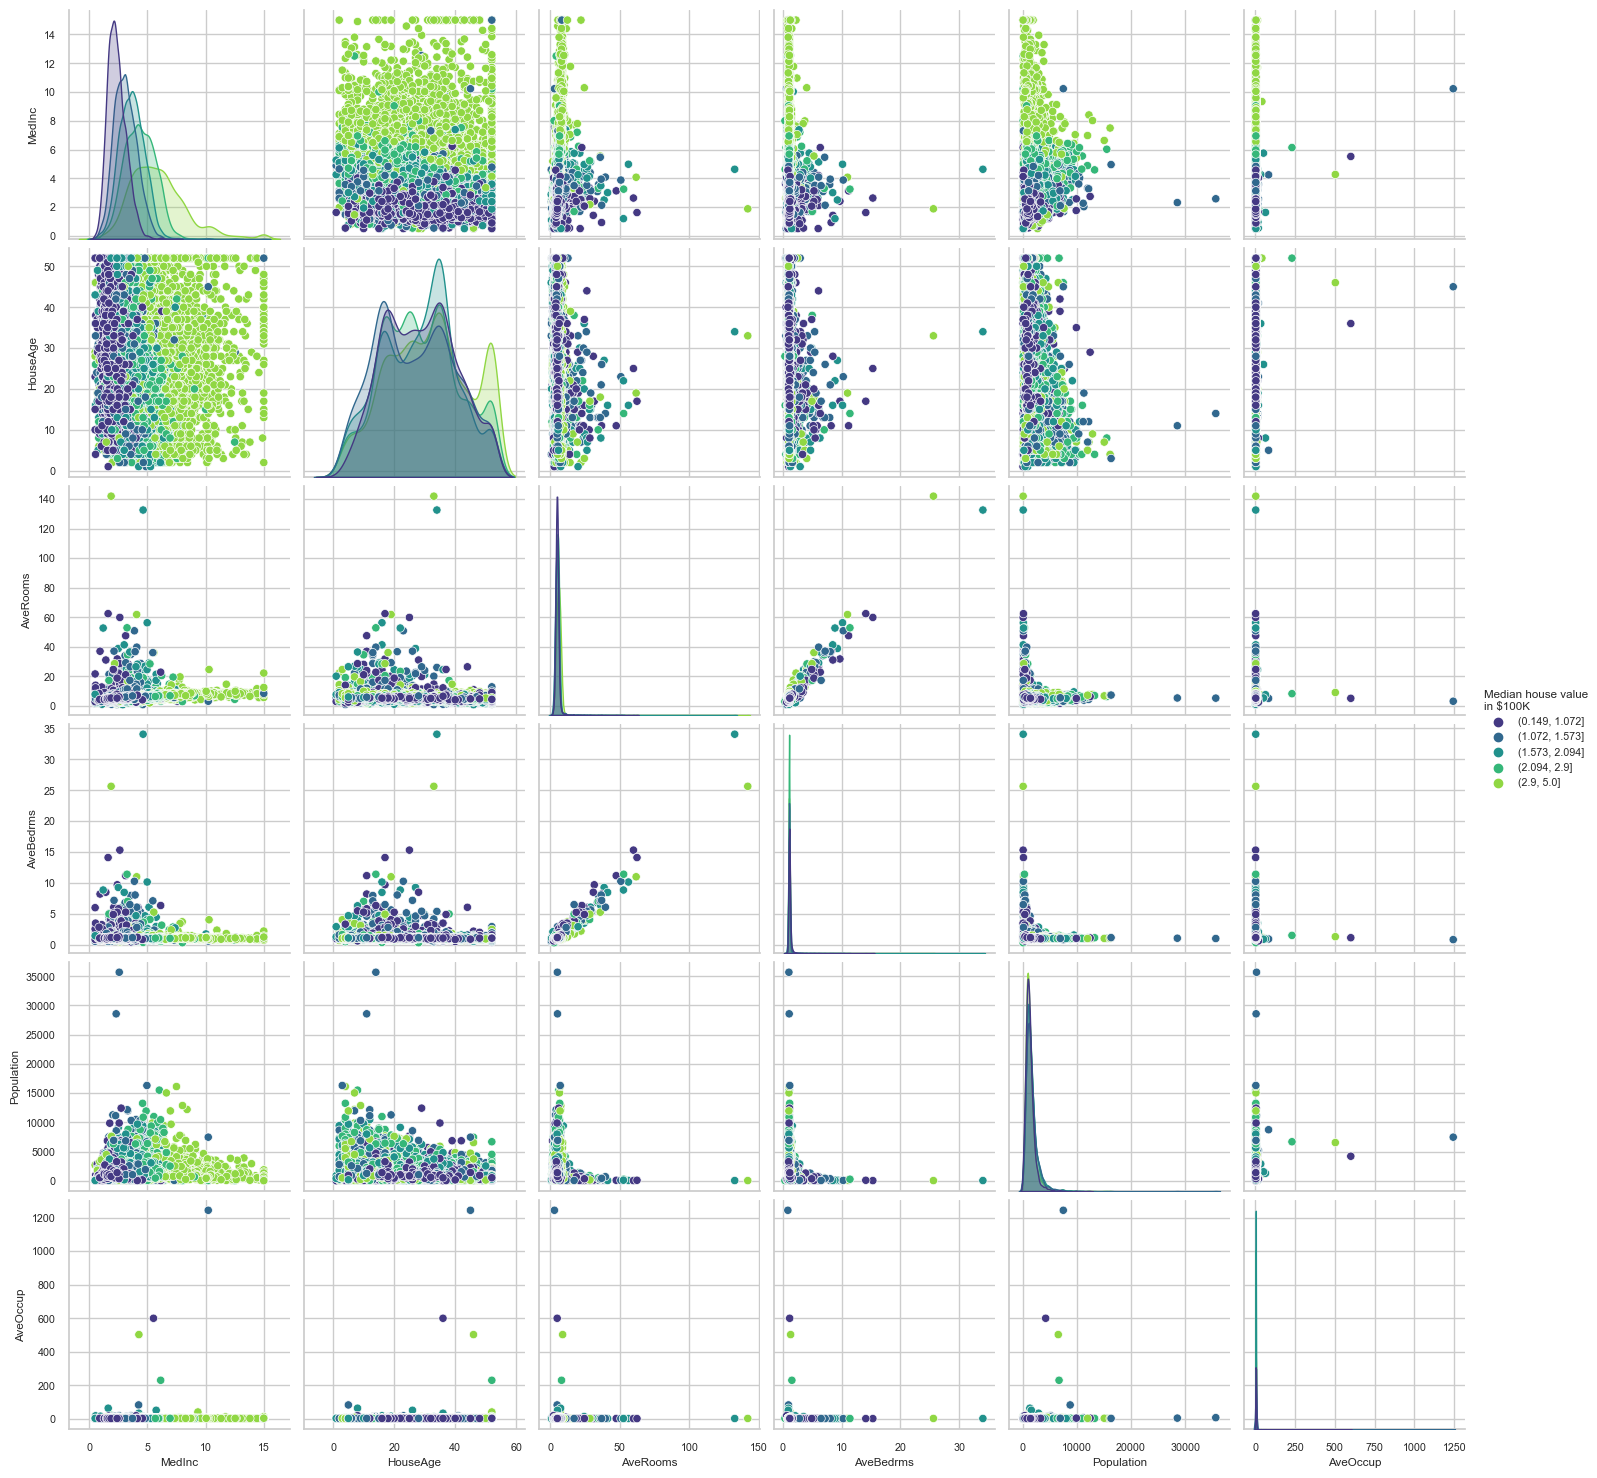

In [265]:
## Plot pairwise relationships in a dataset
pp = sns.pairplot(data=df_subset, hue="MedHouseVal", palette="viridis");
pp._legend.set_title('Median house value\nin $100K');

### Boxplot (all variables) / Outliers

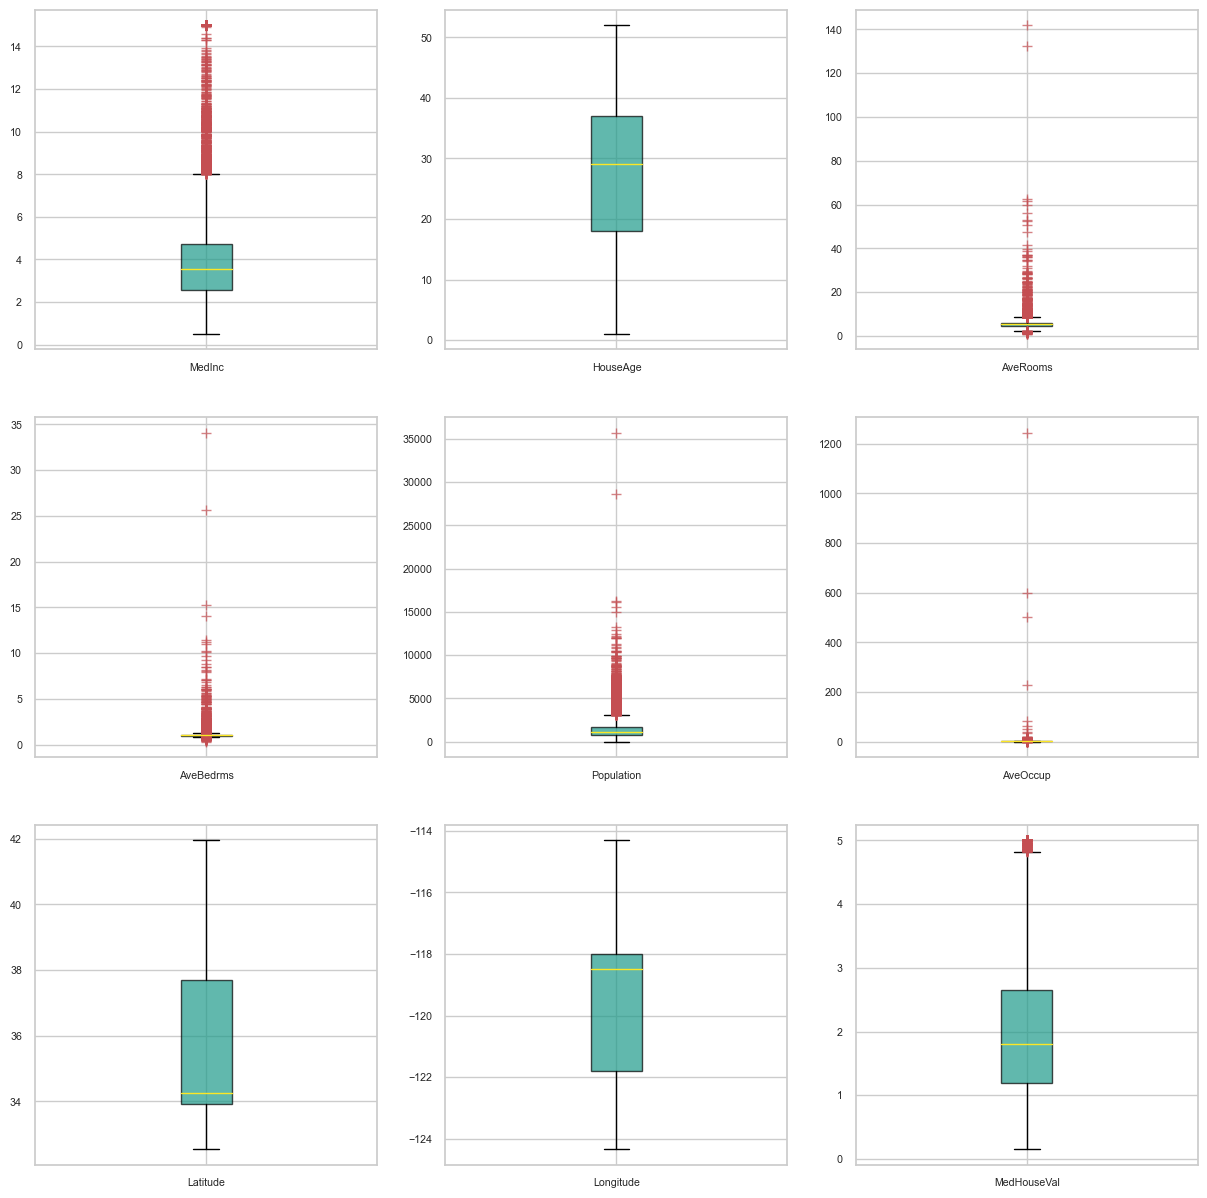

In [292]:
## color, line, style properties for the boxplot
flierprops = dict(marker='+', markerfacecolor='g', markersize=7,
                  linestyle='none', markeredgecolor='r', linewidth=0.1, alpha=.7)
color=dict(boxes='r', whiskers='black', medians='#fde725', caps='black')
boxprops = dict(facecolor= "#1E9B8AFF", linestyle='-', linewidth=1, color='black', alpha=.7)

a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in df:
    plt.subplot(a, b, c)
    df.boxplot(i, flierprops=flierprops, color=color, boxprops=boxprops, patch_artist=True);
    #sns.boxplot(y=i, data=df, flierprops=flierprops, palette='viridis', width=0.2)
    c+=1

### Correlation matrix (all variables)

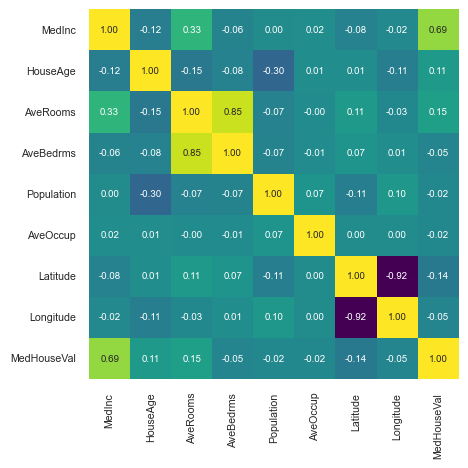

In [248]:
## create correlation matrix
cm = df.corr()

## change figsize
#fig = plt.figure(figsize=(10,10))

## plot heatmap
hm = sns.heatmap(cm, 
                 cbar=False, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 7}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="viridis");

### Location plot / population

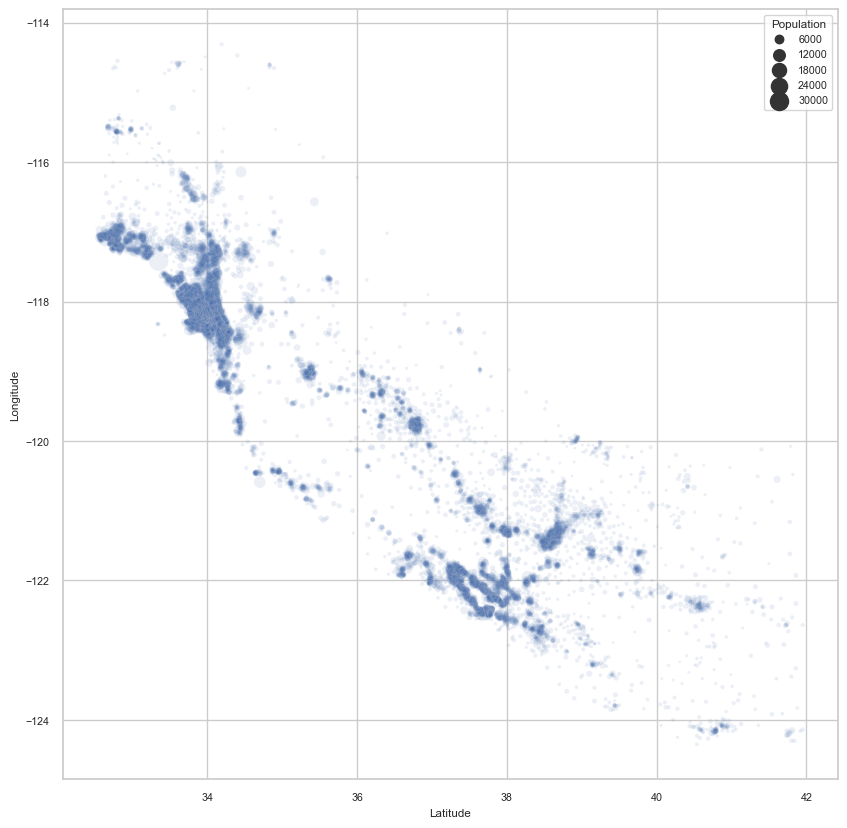

In [295]:
plt.figure(figsize=(10,10))
sns.set_style(style='whitegrid')
sns.scatterplot(data=df, x='Latitude', y='Longitude', size='Population', sizes=(4, 200), palette='viridis', alpha=0.1);

### Location plot / median house prices

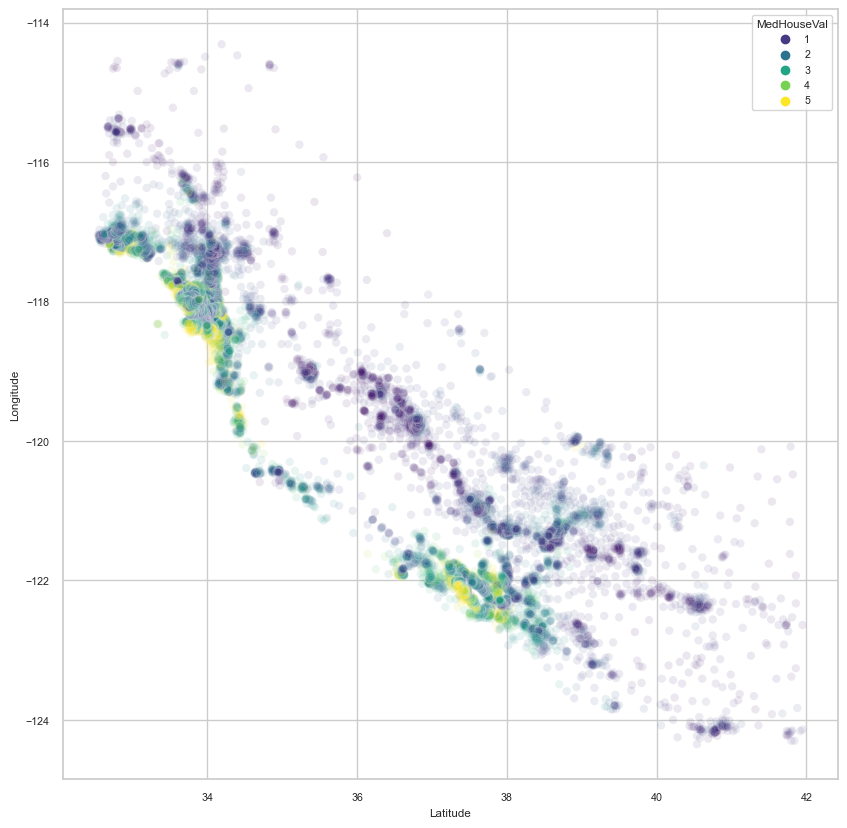

In [262]:
plt.figure(figsize=(10,10))
sns.set_style(style='whitegrid')
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='MedHouseVal', palette='viridis', alpha=0.1);

### Location plot / median income

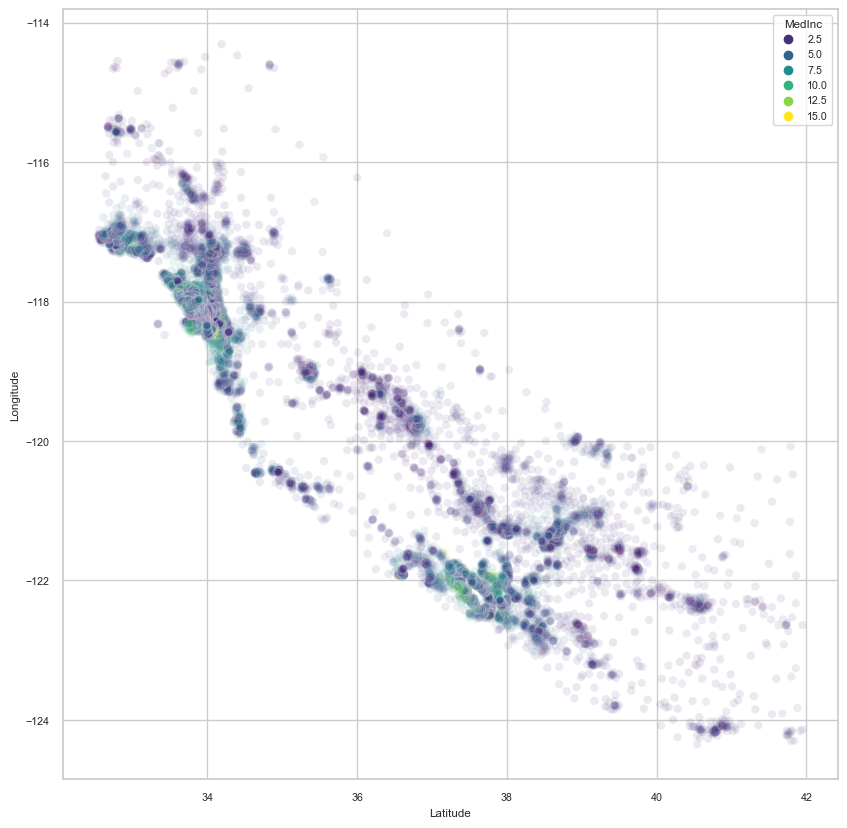

In [263]:
plt.figure(figsize=(10,10))
sns.set_style(style='whitegrid')
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='MedInc', palette='viridis', alpha=0.1);

## Regplot MedInc / MedHouseVal

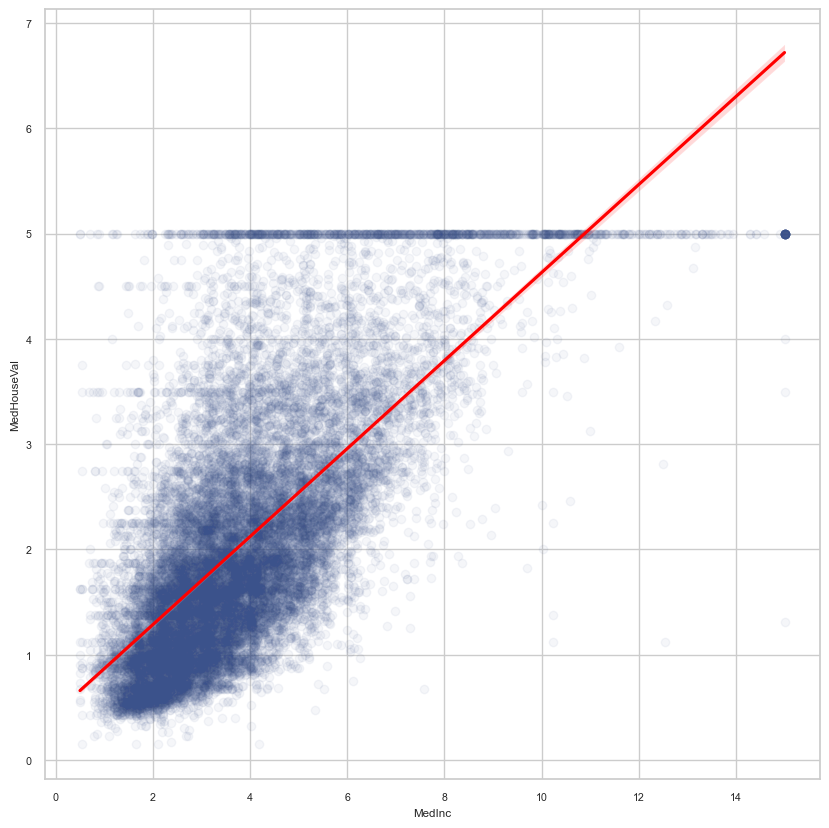

In [293]:
plt.figure(figsize=(10,10))
sns.set_style(style='whitegrid')
sns.regplot(data= df, x='MedInc', y='MedHouseVal',
            scatter_kws={"color": '#3b528b', 'alpha':0.05}, line_kws={"color": "red"});

# Part B: Data Science Product

## Questions:

- What sort of **Machine Learning problem** is this?
- What **features** would you use as input to solve this problem? Why those?
- What **algorithm** would you use to solve this problem? Why this algorithm?
- How would you set up **training and evaluation**?
- How would you assess the **performance** of your solution?
- How would you assess the **quality** of your source code?
- How would you **ship your trained ML model** to the customer?
- Two weeks after shipping your product your customer calls you and **complains about low accuracy** of your product. How would you react?

## Concept

**Problem.** This is a regression problem since the target *y* is a continious variable (supervised learning since y is available for training).

**Features.** The most promissing features *X* for a prediction model are the MedInc (median income in each block group) as well as the features Latitude and Longitude (geo-information). This are on the one hand common factors that influence housing prices but also our EDA supports this hypothesis. 

Optional feature engineering - since Latitude and Longitude are cyclical features, try either to cluster them via Kmeans (or SOM, see below) and get the distance from the points to the centers as features or extract X, Y, and Z in order to be able to normalize them (x = cos(lat) * cos(lon) // y = cos(lat) * sin(lon) // z = sin(lat)).

**Algorithms.** I would propose to start with a simple linear regression model as a baseline but immediately move on to a *RidgeCV* (Linear least squares with l2 regularization and k-fold cross validation) in order to avoid overfitting due to the fact that the dataset is quite small. Further I would try to train models (*Ridge, Lasso, ElasticNet*) with all the features in order to also check a potential multicolinarity of the features (ex. rooms).

In order to increase the complexity of the model I would also propose to try other approaches such as *Decission Trees and Ensemble Methods (Random Forrest, GradientBoosting, Xgboost...all made to find non-linear relationships)* with various hypterparameters in a RandomizedSearchCV and/or GridSearchCV with different models (again check feature importances and/or permutation -> in general less features allows for more interpretability, is faster to train (speed, computational costs) and easier to implement and maintain in production.). Since there are not too many features (as well as samples) the computational costs are in our case easily manageable. 

As an alternative approach I would propose to use *SOM (Self-organizing-maps)* for clustering (unsupervised) of the features (dealing with outliers) as well as the prediction part (supervised) of the model in order to map the data to 2d from the higher dimensional spaces. The algorithm thereby preserves the topology of the data, provides neighborhoods that one can read (codebook, u-matrix, activation of lattice), allows us to learn about the distribution/weight/importance/ of the features, and last but not least further allows us to predict bmu (best matching units) for future data samples. 

**Train / Evaluation.** Make a train/validation/test split (70/15/15) of X (features) and y (target) - in order to avoid data leackage (never use the test-set for evaluation). At best use pipelines with fit - transform.

Since there are no duplicates and no missing data I would continue to deal with the outliers by using standard scaler (ev. log(feature) if the data is still skewed). Try also an to balance (undersample) MedHouseVal since the prices above 500k are seemingly summarized and therefore not well distributed. 

**Performance.** In order to compare the performance of the different models As a performance metrics I would use MSE/RMSE (comparability) and R2 (goodness-of-fit, interpretability). Further check the learning curves of each model and its hyperparameters (see that they converge at a high score) - all to find a proper bias / variance tradeoff.

**Qualities.** In order to check the quality of my code I would revise it (make functions, modules -> finally create a package - setup.py) following best practices such as extensive commenting, using descriptive variable names, proper coding style, write a README.md, check requirements.txt, use Makefiles (command line) and also by testing the code (make test files). 

**Ship the product.** The model could be shipped as a webapplication made with Streamlit (or flask etc...) where the customer can input new data and get a prediction from the pre-trained model. But this depends, if the customer wants to have a standalone application (frondend, terminal,...?) - or use the model embedded in another application (CAD program, Rhino (Grasshopper), Blender...?). The model could also be put on the cloud so that it can be used via an API, as well as being optimized, maintained and regularly updated (such as with new datapoints from real-time data streams such as real estate platforms - this would especially make sense in our case of house price predictions.

**Model Lifecycle / Maintainance.** we would ask the customer for the data he wants to get the prediction for in order to gain further insight into the problem. Maybe the trained model has been overfitted. Maybe the new data contains outliers. Maybe we can get more samples to train on, or updated (real-time) data since the housing market is rapidly evolving. Further we could revise the data quality, model quality, model bias, and model explainability - get more features (open data), do further feature engineering (distance to city centers, sea, public transport, schools, and other urban infrastructure). Retrain the model. 
